INTRODUCTION

Stroke prediction using machine learning aims to analyze various health and lifestyle factors to predict an individual’s risk of experiencing a stroke, enabling early intervention and prevention.

IMPORT LIBRARIES AND LOADING DATA

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
data=pd.read_csv(r"D:\data_analytics\project\Stroke_Prediction_Indians.csv")
data.head(10)

,ID,Age,Gender,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Average_Glucose_Level,BMI,...,Dietary_Habits,Alcohol_Consumption,Chronic_Stress,Sleep_Hours,Family_History_of_Stroke,Education_Level,Income_Level,Stroke_Risk_Score,Region,Stroke_Occurrence
0,1,78,Female,0,0,1,Private,Rural,267.30,36.2,...,Non-Vegetarian,0,0,11,0,Tertiary,Middle,88,South,0
1,2,60,Female,0,0,0,Private,Rural,207.24,19.8,...,Vegetarian,0,0,9,0,Secondary,High,56,East,0
2,3,69,Male,0,0,0,Private,Urban,161.30,34.5,...,Mixed,1,0,3,0,Secondary,High,63,North,1
3,4,43,Male,0,0,1,Never Worked,Urban,247.49,48.8,...,Mixed,0,1,4,0,Tertiary,Middle,93,South,0
4,5,30,Female,0,0,1,Government,Urban,116.57,31.3,...,Mixed,0,1,9,0,Secondary,High,99,West,0
5,6,53,Male,1,0,1,Government,Urban,220.62,49.9,...,Non-Vegetarian,0,1,7,0,No education,Low,56,North,0
6,7,83,Female,0,0,0,Children,Urban,193.32,46.8,...,Vegetarian,0,0,5,0,Secondary,High,87,South,0
7,8,43,Female,0,0,0,Never Worked,Urban,198.59,23.3,...,Mixed,0,0,10,0,Primary,Low,5,North,0
8,9,62,Male,1,0,0,Children,Rural,117.81,16.5,...,Non-Vegetarian,1,0,8,1,Secondary,Low,98,East,0
9,10,35,Male,0,0,0,Government,Urban,289.09,37.0,...,Vegetarian,0,0,8,0,Tertiary,Middle,94,East,0


DATA CLEANING

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172000 entries, 0 to 171999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        172000 non-null  int64  
 1   Age                       172000 non-null  int64  
 2   Gender                    172000 non-null  object 
 3   Hypertension              172000 non-null  int64  
 4   Heart_Disease             172000 non-null  int64  
 5   Ever_Married              172000 non-null  int64  
 6   Work_Type                 172000 non-null  object 
 7   Residence_Type            172000 non-null  object 
 8   Average_Glucose_Level     172000 non-null  float64
 9   BMI                       172000 non-null  float64
 10  Smoking_Status            172000 non-null  object 
 11  Physical_Activity         172000 non-null  object 
 12  Dietary_Habits            172000 non-null  object 
 13  Alcohol_Consumption       172000 non-null  i

In [3]:
data.isna().sum()

ID                          0
Age                         0
Gender                      0
Hypertension                0
Heart_Disease               0
Ever_Married                0
Work_Type                   0
Residence_Type              0
Average_Glucose_Level       0
BMI                         0
Smoking_Status              0
Physical_Activity           0
Dietary_Habits              0
Alcohol_Consumption         0
Chronic_Stress              0
Sleep_Hours                 0
Family_History_of_Stroke    0
Education_Level             0
Income_Level                0
Stroke_Risk_Score           0
Region                      0
Stroke_Occurrence           0
dtype: int64

In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
label=LabelEncoder()
data['Dietary_Habits']=label.fit_transform(data['Dietary_Habits'])
data['Physical_Activity']=label.fit_transform(data['Physical_Activity'])
data['Smoking_Status']=label.fit_transform(data['Smoking_Status'])


DATA VISUALIZATION BY FINDING CORRELATION BETWEEN THE DATAS

                       Dietary_Habits  Physical_Activity  Smoking_Status  \
Dietary_Habits               1.000000          -0.001862        0.000874   
Physical_Activity           -0.001862           1.000000       -0.002701   
Smoking_Status               0.000874          -0.002701        1.000000   
Hypertension                -0.000599          -0.001889        0.000259   
Heart_Disease               -0.001397          -0.001471        0.001181   
Average_Glucose_Level       -0.001977           0.002698        0.000101   
BMI                         -0.008001          -0.003495       -0.000953   
Sleep_Hours                  0.001584          -0.000096       -0.005382   
Stroke_Risk_Score           -0.002018          -0.000510        0.003552   
Stroke_Occurrence           -0.002027           0.002819       -0.003669   

                       Hypertension  Heart_Disease  Average_Glucose_Level  \
Dietary_Habits            -0.000599      -0.001397              -0.001977   
Physical_

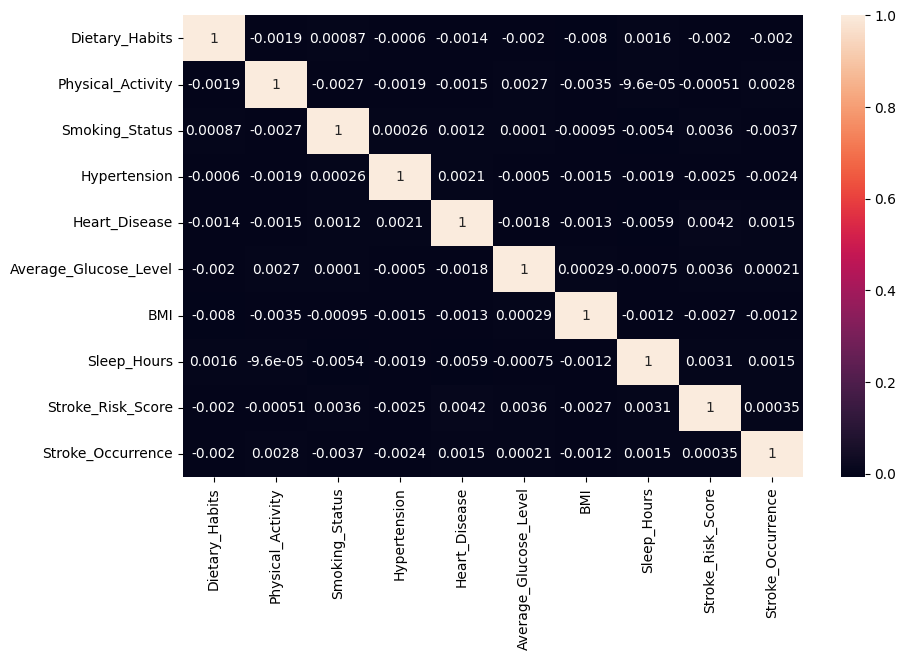

In [6]:
col=['Dietary_Habits','Physical_Activity','Smoking_Status','Hypertension','Heart_Disease','Average_Glucose_Level','BMI','Sleep_Hours','Stroke_Risk_Score','Stroke_Occurrence']
cor_metrix=data[col].corr()
print(cor_metrix)
plt.figure(figsize=(10,6))
sns.heatmap(cor_metrix,annot=True)
plt.show()

EXTRACTING INDEPENDENT AND DEPENDENT VARIABLES

In [7]:
x=data.iloc[:,[3,4,8,9,10,11,12,13,14,15,16,19]]
x=pd.DataFrame(x)
y=data['Stroke_Occurrence']
y=pd.DataFrame(y)

SPLITING DATA INTO TRAIN AND TEST DATA

In [8]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=20,random_state=89)

FEATURE SCALING

In [9]:
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)

MODELS BUILDING

CHECKING ACCURACY BY USING SVM

In [10]:
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [11]:
y_pedict=model.predict(x_test)
print(y_test)
print(y_pedict)

        Stroke_Occurrence
138220                  0
102858                  0
29441                   0
123234                  0
58037                   0
...                   ...
159624                  0
150970                  0
136491                  0
71812                   0
57630                   0

[171980 rows x 1 columns]
[0 0 0 ... 0 0 0]


In [12]:
mse_value=metrics.mean_squared_error(y_test,y_pedict)
print(mse_value)
accuracy=metrics.accuracy_score(y_test,y_pedict)
print(accuracy)

0.12837539248749855
0.8716246075125015


CHECKING ACCURACY BY USING KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [14]:
y_predict=classifier.predict(x_test)
print(y_test)
print(y_predict)

        Stroke_Occurrence
138220                  0
102858                  0
29441                   0
123234                  0
58037                   0
...                   ...
159624                  0
150970                  0
136491                  0
71812                   0
57630                   0

[171980 rows x 1 columns]
[0 0 0 ... 0 0 0]


In [15]:
print("mse value of KNN:",metrics.mean_absolute_error(y_predict,y_test))
print('accuracy in KNN:',metrics.accuracy_score(y_predict,y_test))

mse value of KNN: 0.09939527852075823
accuracy in KNN: 0.9006047214792418


CHECKING ACCURACY BY USING LOGISTIC REGREESION

In [16]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_predict=model1.predict(x_test)
print(y_test)
print(y_predict)

        Stroke_Occurrence
138220                  0
102858                  0
29441                   0
123234                  0
58037                   0
...                   ...
159624                  0
150970                  0
136491                  0
71812                   0
57630                   0

[171980 rows x 1 columns]
[0 0 0 ... 0 0 0]


In [18]:
print("mse value of logistic regression:",metrics.mean_absolute_error(y_predict,y_test))
print('accuracy in logistic regression:',metrics.accuracy_score(y_predict,y_test))

mse value of logistic regression: 0.10612280497732295
accuracy in logistic regression: 0.893877195022677


CHECKING ACCURACY BY USING RANDOM FOREST

In [19]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=10,criterion='entropy')
model2.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [20]:
y_predict=model2.predict(x_test)
print(y_test)
print(y_predict)

        Stroke_Occurrence
138220                  0
102858                  0
29441                   0
123234                  0
58037                   0
...                   ...
159624                  0
150970                  0
136491                  0
71812                   0
57630                   0

[171980 rows x 1 columns]
[0 0 0 ... 0 0 0]


In [21]:
print("mse value of random forest:",metrics.mean_absolute_error(y_predict,y_test))
print('accuracy in random forest:',metrics.accuracy_score(y_predict,y_test))


mse value of random forest: 0.10372717757878823
accuracy in random forest: 0.8962728224212118


CHECKING ACCURACY BY USING DECISION TREE

In [22]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(criterion='entropy',random_state=67)
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=67)

In [23]:
y_predict=model3.predict(x_test)
print(y_test)
print(y_predict)

        Stroke_Occurrence
138220                  0
102858                  0
29441                   0
123234                  0
58037                   0
...                   ...
159624                  0
150970                  0
136491                  0
71812                   0
57630                   0

[171980 rows x 1 columns]
[0 0 0 ... 0 0 0]


In [24]:
print("mse value of decision tree:",metrics.mean_absolute_error(y_predict,y_test))
print('accuracy in decision tree:',metrics.accuracy_score(y_predict,y_test))


mse value of decision tree: 0.11325735550645424
accuracy in decision tree: 0.8867426444935458


SUMMARY

In this project, we use machine learning techniques to predict stroke risk based on factors like age, medical history, and lifestyle habits. After experimenting with different algorithms, KNN emerged as the best model due to its high accuracy of 90%,making it a reliable choice for stroke prediction.